In [12]:
import pandas as pd 
import numpy as np
import seaborn as sns
data = pd.read_csv('keywords.txt', sep="\t",names=['word','Frequency'])
data

,word,Frequency
0,地震,50608
1,汶川,38552
2,哄抢,38159
3,救灾物资,38153
4,原因,35437
...,...,...
87196,出题,1
87197,坐斑疮,1
87198,hpu,1
87199,之陆,1


In [13]:
data.describe()

,Frequency
count,87201.000000
mean,27.290719
std,381.382374
min,1.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,50608.000000


In [14]:
data['target']=0
conditions = [
    data['Frequency'] >=500,
    (data['Frequency'] <500 )& (data['Frequency']>=200),
    (data['Frequency'] <200) & (data['Frequency']>=50),
    (data['Frequency'] <50) & (data['Frequency']>=10)]
rating = [4,3,2,1]
data['rating'] = np.select(conditions, rating, default=0)
print(data)
data.rating.value_counts()

       word  Frequency  target  rating
0        地震      50608       0       4
1        汶川      38552       0       4
2        哄抢      38159       0       4
3      救灾物资      38153       0       4
4        原因      35437       0       4
...     ...        ...     ...     ...
87196    出题          1       0       0
87197   坐斑疮          1       0       0
87198   hpu          1       0       0
87199    之陆          1       0       0
87200  财经新闻          1       0       0

[87201 rows x 4 columns]


0    65559
1    16043
2     4016
3      962
4      621
Name: rating, dtype: int64

[Text(0.5, 0, 'Word Label'),
 Text(0, 0.5, 'Word Frequency'),
 Text(0.5, 1.0, 'Word Frequency With Different Labels')]

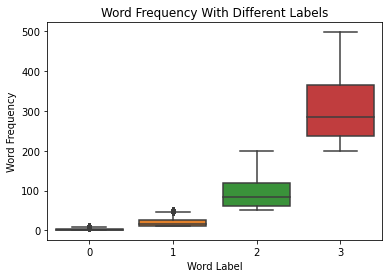

In [20]:
data2=data[data['rating']<4]
bx = sns.boxplot(x="rating", y='Frequency', data =data2)
bx.set(xlabel='Word Label', ylabel='Word Frequency', title='Word Frequency With Different Labels')

In [ ]:
bx = sns.violinplot(x="rating", y='Frequency', data = data2)
bx.set(xlabel='Word Label', ylabel='Word Frequency', title='Word Frequency With Different Labels')

In [8]:
keywords.to_csv('keywords.csv',sep=",")